In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import functional
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader,random_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    print('CUDA is available!  Training on GPU ...')
    device=torch.device('cuda')
else:
    print('CUDA is not available.  Training on CPU ...')
    device=torch.device('cpu')

CUDA is available!  Training on GPU ...


In [3]:
num_workers = 0
batch_size = 20
valid_size = 0.2
transform = transforms.Compose([transforms.Resize(227),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


/home/himanshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':


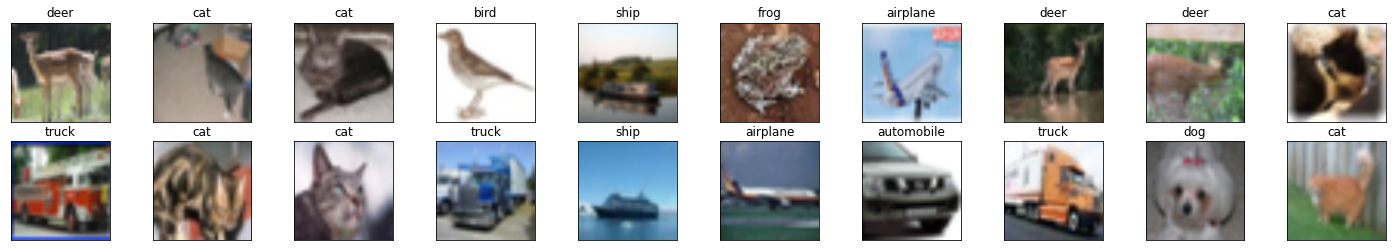

In [4]:
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0))) 
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [11]:
class alex_net(nn.Module):
    def __init__(self):
        super(alex_net,self).__init__()
        self.C1=nn.Conv2d(3,96,kernel_size=(11,11),stride=4)
        self.pool=nn.MaxPool2d(3,2)
        self.C2=nn.Conv2d(96,256,kernel_size=(5,5),padding=2)
        self.C3=nn.Conv2d(256,384,kernel_size=(3,3),padding=1)
        self.C4=nn.Conv2d(384,384,kernel_size=(3,3),padding=1)
        self.C5=nn.Conv2d(384,256,kernel_size=(3,3),padding=1)
        self.fc1=nn.Linear(9216,1024)
        self.fc2=nn.Linear(1024,128)
        self.fc3=nn.Linear(128,10)
        self.drop=nn.Dropout(0.5)
    def forward(self,x):
        x=self.pool(F.relu(self.C1(x)))
        x=self.pool(F.relu(self.C2(x)))
        x=F.relu(self.C3(x))
        x=F.relu(self.C4(x))
        x=self.pool(F.relu(self.C5(x)))
        x=x.view(x.shape[0],-1)
        x=self.drop(F.relu(self.fc1(x)))
        x=self.drop(F.relu(self.fc2(x)))
        x=self.fc3(x)
        return x
model=alex_net()
model=model.to(device)
print(model)

alex_net(
  (C1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (C2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (C3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (C4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (C5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=9216, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)


In [10]:
from torchsummary import summary
summary(model)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            34,944
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            614,656
├─Conv2d: 1-4                            885,120
├─Conv2d: 1-5                            1,327,488
├─Conv2d: 1-6                            884,992
├─Linear: 1-7                            9,438,208
├─Linear: 1-8                            131,200
├─Linear: 1-9                            1,290
├─Dropout: 1-10                          --
Total params: 13,317,898
Trainable params: 13,317,898
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            34,944
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            614,656
├─Conv2d: 1-4                            885,120
├─Conv2d: 1-5                            1,327,488
├─Conv2d: 1-6                            884,992
├─Linear: 1-7                            9,438,208
├─Linear: 1-8                            131,200
├─Linear: 1-9                            1,290
├─Dropout: 1-10                          --
Total params: 13,317,898
Trainable params: 13,317,898
Non-trainable params: 0

In [6]:
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.CrossEntropyLoss()

In [7]:
from tqdm.notebook import tqdm
n_epochs = 3

valid_loss_min = np.Inf 
last_loss=None
train_losses, val_losses = [], []
for epoch in tqdm(range(1, n_epochs+1)):

    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
    model.eval()
    for data, target in valid_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
    
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    train_losses.append(train_loss)
    val_losses.append(valid_loss)
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

  0%|          | 0/3 [00:00<?, ?it/s]

/home/himanshu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1 	Training Loss: 45.051120 	Validation Loss: 0.461110
Validation loss decreased (inf --> 0.461110).  Saving model ...
Epoch: 2 	Training Loss: 1.843472 	Validation Loss: 0.461043
Validation loss decreased (0.461110 --> 0.461043).  Saving model ...
Epoch: 3 	Training Loss: 1.844172 	Validation Loss: 0.461067


NameError: name 'test_losses' is not defined

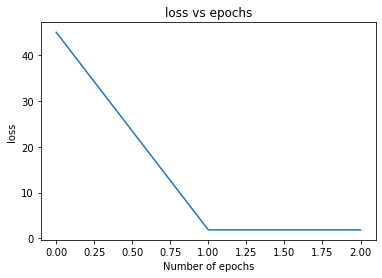

In [8]:
plt.title("loss vs epochs")
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.plot(train_losses,label='train')
plt.plot(test_losses,label='test')
plt.legend()
plt.show()